In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bayesian_bandit import Bandit

In [5]:
def run_experiment(p1, p2, p3, N):
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
    
    data = np.empty(N) # Tracking
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits]) # Choose the best bandit to pull
        x = bandits[j].pull() # Pull the best bandit
        bandits[j].update(x) # Update the result
        
        data[i] = x

    cumulative_avg_ctr = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_avg_ctr)
    plt.plot(np.ones(N) * p1)
    plt.plot(np.ones(N) * p2)
    plt.plot(np.ones(N) * p3)
    plt.ylim((0,1))
    plt.xscale('log')
    plt.show()

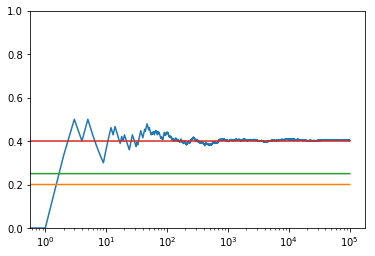

In [7]:
run_experiment(0.2, 0.25, 0.4, 100000)

Eventually, it will converge to the bandit with the best probability.